In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_csv("tips.csv")

# **1. Read the tips dataset from the provided source only. Handle the missing values with the appropriate techniques.**

*i) Mean, median and Mode imputation*

In [28]:
df = pd.read_csv('tips.csv',usecols=['sex','time','total_bill'])

In [29]:
df.isnull().mean()

total_bill    0.159836
sex           0.000000
time          0.000000
dtype: float64

In [30]:
def impute_nan(df, variable, method):
    df[variable+'_median'] = df[variable].fillna(method)

In [32]:
method = df.total_bill.median() # it can be mean/median/ mode
# not using mean coz there may be some outliers
method

19.44

In [33]:
impute_nan(df,'total_bill',method)

In [34]:
df.head()

,total_bill,sex,time,total_bill_median
0,16.99,Female,Dinner,16.99
1,NaN,Male,Dinner,19.44
2,21.01,Male,Dinner,21.01
3,23.68,Male,Dinner,23.68
4,24.59,Female,Dinner,24.59


*ii) Random Sample Imputation*

In [36]:
df = pd.read_csv('tips.csv', usecols=['sex','time','total_bill'])
df.isnull().sum()

total_bill    39
sex            0
time           0
dtype: int64

In [37]:
df['total_bill'].isnull().sum()

39

In [38]:
random_sample= df['total_bill'].dropna().sample(df['total_bill'].isnull().sum(),random_state=50)
random_sample

134    18.26
197    43.11
14     14.83
84     15.98
171    15.81
23     39.42
125    29.80
9      14.78
43      9.68
103    22.42
93     16.32
190    15.69
79     17.29
191    19.81
29     19.65
114    25.71
158    13.39
26     13.37
102    44.30
227    20.45
111     7.25
94     22.75
28     21.70
210    30.06
162    16.21
239    29.03
126     8.52
38     18.69
112    38.07
194    16.58
146    18.64
187    30.46
87     18.28
181    23.33
140    17.47
166    20.76
72     26.86
61     13.81
185    20.69
Name: total_bill, dtype: float64

In [39]:
df[df['total_bill'].isnull()].index

Int64Index([  1,  10,  16,  27,  50,  51,  58,  62,  70,  75,  82,  97,  99,
            100, 117, 118, 120, 124, 128, 132, 133, 136, 147, 161, 168, 169,
            196, 198, 201, 202, 209, 215, 217, 220, 226, 232, 233, 235, 236],
           dtype='int64')

In [40]:
def impute_nan_random(df, variable):
    df[variable+"_random"] = df[variable]
    # it will have random sample to fill the na
    random_sample = df[variable].dropna().sample(df['total_bill'].isnull().sum(),random_state = 0)
    # pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [41]:
impute_nan_random(df,"total_bill")
df.head(4)

,total_bill,sex,time,total_bill_random
0,16.99,Female,Dinner,16.99
1,NaN,Male,Dinner,48.27
2,21.01,Male,Dinner,21.01
3,23.68,Male,Dinner,23.68


In [45]:
df['total_bill_median']=df['total_bill'].fillna(df.total_bill.median())
df['total_bill_mean']=df['total_bill'].fillna(df.total_bill.mean())
df.head(2)

,total_bill,sex,time,total_bill_random,total_bill_median,total_bill_mean
0,16.99,Female,Dinner,16.99,16.99,16.990000
1,NaN,Male,Dinner,48.27,19.44,21.360195


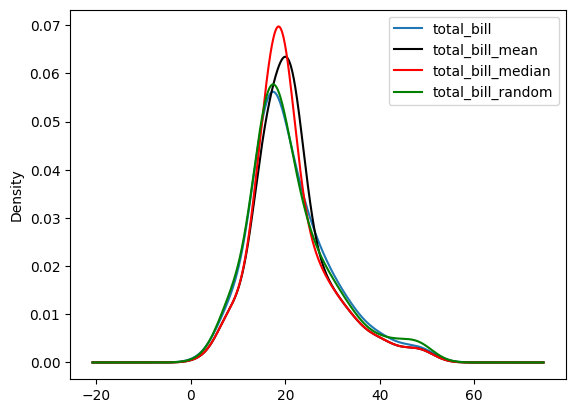

In [46]:
fig = plt.figure()
ax =  fig.add_subplot(111)
df['total_bill'].plot(kind='kde', ax=ax)
df.total_bill_mean.plot(kind='kde', ax=ax, color = 'black')
df.total_bill_median.plot(kind='kde', ax=ax, color = 'red')
df.total_bill_random.plot(kind='kde', ax=ax, color = 'green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

*iii) Capturing NAN values with a new feature*

In [49]:
import pandas as pd
import numpy as np
df = pd.read_csv('tips.csv', usecols=['sex','time','total_bill'])
# survived is dependent feature
df.head(2)

,total_bill,sex,time
0,16.99,Female,Dinner
1,NaN,Male,Dinner


In [50]:
df['total_bill_NAN'] = np.where(df['total_bill'].isnull(),1,0)
df.head(2)

,total_bill,sex,time,total_bill_NAN
0,16.99,Female,Dinner,0
1,NaN,Male,Dinner,1


In [51]:
df[df.total_bill.isnull()]

,total_bill,sex,time,total_bill_NAN
1,NaN,Male,Dinner,1
10,NaN,Male,Dinner,1
16,NaN,Female,Dinner,1
27,NaN,Male,Dinner,1
50,NaN,Male,Dinner,1
51,NaN,Female,Dinner,1
58,NaN,Male,Dinner,1
62,NaN,Male,Dinner,1
70,NaN,Male,Dinner,1
75,NaN,Male,Dinner,1


# **2. Handle the categorical data in the tips dataset with the relevant approaches such as label-encoding, one hot encoding, ordinal encoding.**

*Label Encoding*

In [9]:
from sklearn.preprocessing import LabelEncoder

label1 = LabelEncoder()
df['sex'] = label1.fit_transform(df['sex'])
df['smoker'] = label1.fit_transform(df['smoker'])
df['day'] = label1.fit_transform(df['day'])
df['time'] = label1.fit_transform(df['time'])
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,0,0,2,0,2
1,1,19.44,1.66,1,0,2,0,3
2,2,21.01,3.50,1,0,2,0,3
3,3,23.68,3.31,1,0,2,0,2
4,4,24.59,3.61,0,0,2,0,4


*Ordinal Encoding*

In [53]:
from sklearn.preprocessing import OrdinalEncoder
ds = ps.read_csv("tips.csv")
enc = OrdinalEncoder()

In [11]:
ds['sex'] = enc.fit_transform(ds[['sex']])
ds['smoker'] = enc.fit_transform(ds[['smoker']])
ds['day'] = enc.fit_transform(ds[['day']])
ds['time'] = enc.fit_transform(ds[['time']])
ds['size'] = enc.fit_transform(ds[['size']])

In [12]:
ds.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,0.0,0.0,2.0,0.0,1.0
1,1,NaN,1.66,1.0,0.0,2.0,0.0,2.0
2,2,21.01,3.50,1.0,0.0,2.0,0.0,2.0
3,3,23.68,3.31,1.0,0.0,2.0,0.0,1.0
4,4,24.59,3.61,0.0,0.0,2.0,0.0,3.0


# **3. Perform feature scaling techniques such as min-max normalization, standardization, z-score, on the tips dataset.**

*Min-max normalization*

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [14]:
df1 = scaler.transform(df)
df1

array([[0.        , 0.29157939, 0.00111111, ..., 0.66666667, 0.        ,
        0.2       ],
       [0.00411523, 0.34289904, 0.07333333, ..., 0.66666667, 0.        ,
        0.4       ],
       [0.00823045, 0.3757855 , 0.27777778, ..., 0.66666667, 0.        ,
        0.4       ],
       ...,
       [0.99176955, 0.41055718, 0.11111111, ..., 0.33333333, 0.        ,
        0.2       ],
       [0.99588477, 0.30896523, 0.08333333, ..., 0.33333333, 0.        ,
        0.2       ],
       [1.        , 0.32907415, 0.22222222, ..., 1.        , 0.        ,
        0.2       ]])

*standardization*

In [15]:
from sklearn.preprocessing import StandardScaler

obj = StandardScaler()
df2 = obj.fit_transform(df)
df2

array([[-1.72496673e+00, -4.99243641e-01, -1.43994695e+00, ...,
         2.79157595e-01, -6.21581561e-01, -6.00192629e-01],
       [-1.71076947e+00, -1.98219022e-01, -9.69205340e-01, ...,
         2.79157595e-01, -6.21581561e-01,  4.53382921e-01],
       [-1.69657221e+00, -5.31753091e-03,  3.63355539e-01, ...,
         2.79157595e-01, -6.21581561e-01,  4.53382921e-01],
       ...,
       [ 1.69657221e+00,  1.98642007e-01, -7.22971264e-01, ...,
        -8.02024201e-01, -6.21581561e-01, -6.00192629e-01],
       [ 1.71076947e+00, -3.97263872e-01, -9.04025732e-01, ...,
        -8.02024201e-01, -6.21581561e-01, -6.00192629e-01],
       [ 1.72496673e+00, -2.79311368e-01,  1.24660453e-03, ...,
         1.36033939e+00, -6.21581561e-01, -6.00192629e-01]])

# **4. Create a new feature representing the average tip percentage for each dining party size.**

In [16]:
arr1=df['size'].unique()

In [17]:
tip2 = df[df['size']==2].tip.mean()
tip3 = df[df['size']==3].tip.mean()
tip4 = df[df['size']==4].tip.mean()
tip1 = df[df['size']==1].tip.mean()
tip6 = df[df['size']==6].tip.mean()
tip5 = df[df['size']==5].tip.mean()

In [18]:
df.loc[df['size']==2,'tip_average'] = df[df['size']==2].tip.mean()
df.loc[df['size']==3,'tip_average'] = df[df['size']==3].tip.mean()
df.loc[df['size']==4,'tip_average'] = df[df['size']==4].tip.mean()
df.loc[df['size']==1,'tip_average'] = df[df['size']==1].tip.mean()
df.loc[df['size']==6,'tip_average'] = df[df['size']==6].tip.mean()
df.loc[df['size']==5,'tip_average'] = df[df['size']==5].tip.mean()

In [19]:
df['tip_average'].unique()

array([2.58230769, 3.39315789, 4.13540541, 1.4375    , 5.225     ,
       4.028     ])

# **5. Create a new feature based on total bill and tips if total bill is greater than 10  and tips is greater than 3 $ mark as Highest-bills-with-tips otherwise Normal-bills**

In [20]:
df['bill_level'] = 'Normal-bills'
df.loc[(df['total_bill'] > 10) & (df['tip'] > 3), 'bill_level'] = 'Highest-bills-with-tips'

In [21]:
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,tip_average,bill_level
0,0,16.99,1.01,0,0,2,0,2,2.582308,Normal-bills
1,1,19.44,1.66,1,0,2,0,3,3.393158,Normal-bills
2,2,21.01,3.50,1,0,2,0,3,3.393158,Highest-bills-with-tips
3,3,23.68,3.31,1,0,2,0,2,2.582308,Highest-bills-with-tips
4,4,24.59,3.61,0,0,2,0,4,4.135405,Highest-bills-with-tips
